<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [20]:
data = pd.read_csv('data/house_prices_half_mile.csv', sep=';')

# Changing variables for english

data.rename(columns = {
    'precos': 'prices',
    'area': 'area',
    'garagem': 'garage',
    'banheiros': 'bathrooms',
    'lareira': 'fireplace',
    'marmore': 'marble',
    'andares': 'floors'
}, inplace = True)
data.head()

,prices,area,garage,bathrooms,fireplace,marble,floors
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


## Verificando o tamanho do dataset

In [21]:
data.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [22]:
data.describe().round(4)

,prices,area,garage,bathrooms,fireplace,marble,floors
count,1000.0000,1000.000,1000.0000,1000.0000,1000.0000,1000.0000,1000.000
mean,41985.6000,124.326,2.0090,3.0000,2.0340,0.3310,0.485
std,12140.3854,72.390,0.8134,1.4297,1.4188,0.4708,0.500
min,13150.0000,1.000,1.0000,1.0000,0.0000,0.0000,0.000
25%,33112.5000,60.750,1.0000,2.0000,1.0000,0.0000,0.000
50%,41725.0000,123.000,2.0000,3.0000,2.0000,0.0000,0.000
75%,51175.0000,187.000,3.0000,4.0000,3.0000,1.0000,1.000
max,73675.0000,249.000,3.0000,5.0000,4.0000,1.0000,1.000


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [23]:
data.corr().round(4)

,prices,area,garage,bathrooms,fireplace,marble,floors
prices,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garage,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
bathrooms,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
fireplace,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marble,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
floors,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='../data/img/Box-Plot.png'>

## Importando biblioteca seaborn

In [24]:
import seaborn as sns

## Configure o estilo e cor dos gráficos (opcional)

In [25]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("dark")

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

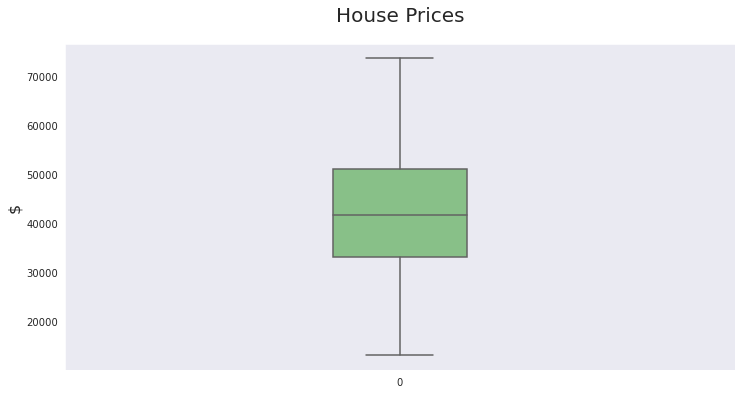

In [26]:
ax = sns.boxplot(data = data['prices'], orient = 'v', width = 0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('House Prices', fontsize = 20, y = 1.05)
ax.set_ylabel('$', fontsize = 16);

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

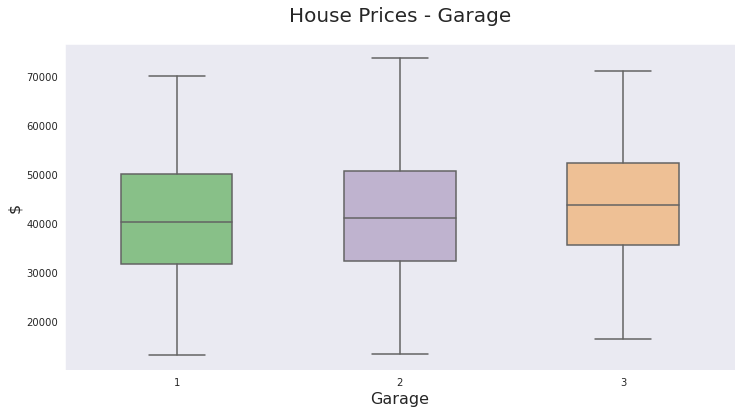

In [27]:
ax = sns.boxplot(x = 'garage', y = 'prices', data = data, orient = 'v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('House Prices - Garage', fontsize = 20, y = 1.05)
ax.set_xlabel('Garage', fontsize = 16)
ax.set_ylabel('$', fontsize = 16);

### Box-plot (Preço X Banheiros)

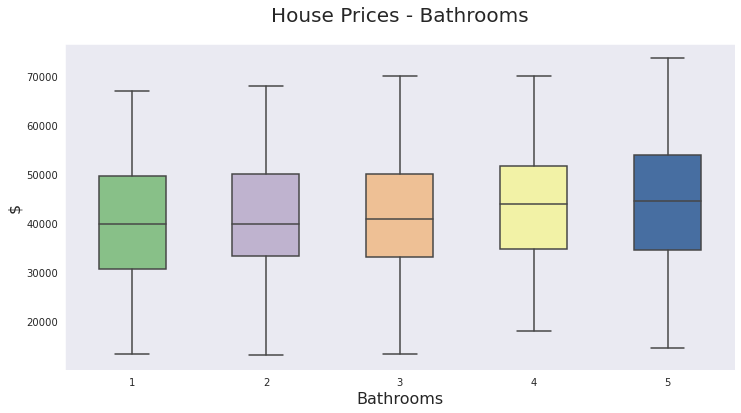

In [28]:
ax = sns.boxplot(x = 'bathrooms', y = 'prices', data = data, orient = 'v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('House Prices - Bathrooms', fontsize = 20, y = 1.05)
ax.set_xlabel('Bathrooms', fontsize = 16)
ax.set_ylabel('$', fontsize = 16);

### Box-plot (Preço X Lareira)

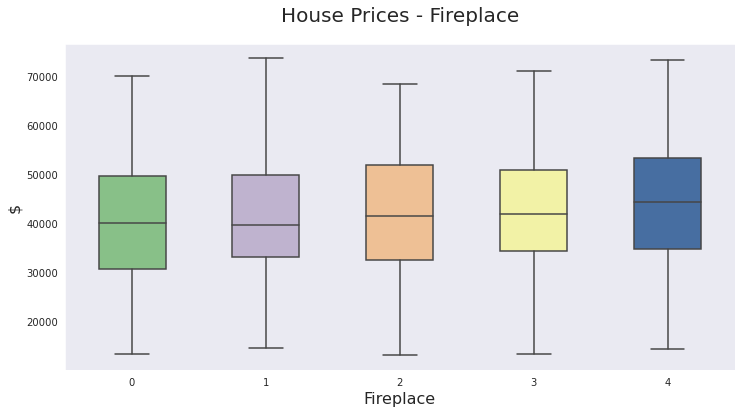

In [29]:
ax = sns.boxplot(x = 'fireplace', y = 'prices', data = data,orient = 'v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('House Prices - Fireplace', fontsize = 20, y = 1.05)
ax.set_xlabel('Fireplace', fontsize = 16)
ax.set_ylabel('$', fontsize = 16);

### Box-plot (Preço X Acabamento em Mármore)

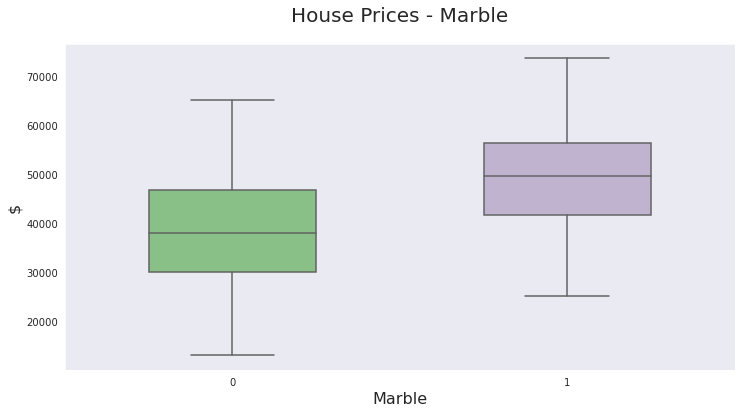

In [30]:
ax = sns.boxplot(x = 'marble', y = 'prices', data = data, orient = 'v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('House Prices - Marble', fontsize = 20, y = 1.05)
ax.set_xlabel('Marble', fontsize = 16)
ax.set_ylabel('$', fontsize = 16);

### Box-plot (Preço X Andares)

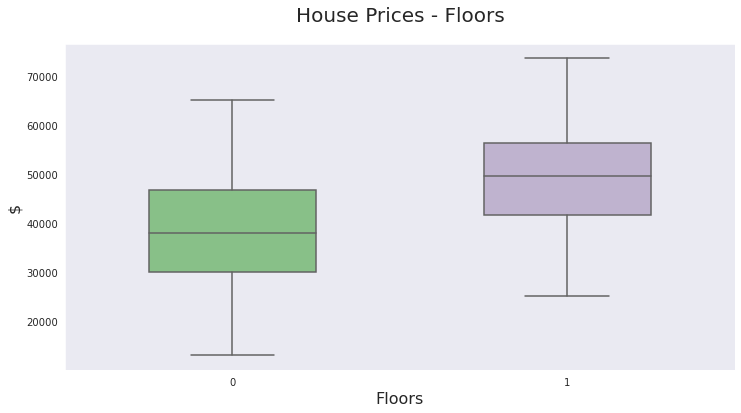

In [31]:
ax = sns.boxplot(x = 'marble', y = 'prices', data = data, orient = 'v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('House Prices - Floors', fontsize = 20, y = 1.05)
ax.set_xlabel('Floors', fontsize = 16)
ax.set_ylabel('$', fontsize = 16);

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

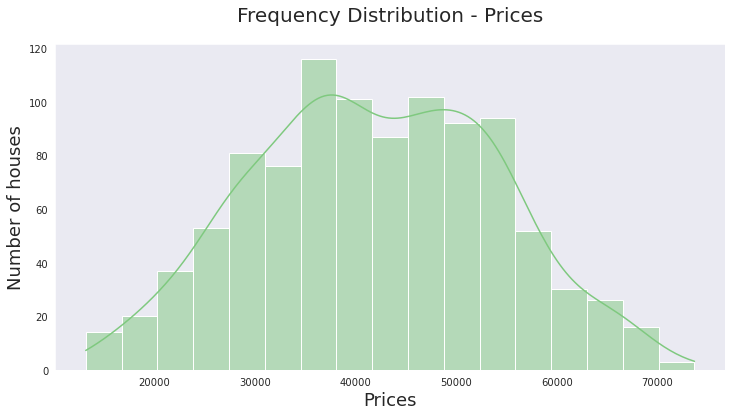

In [32]:
ax = sns.histplot(data['prices'], kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution - Prices', fontsize = 20, y = 1.05)
ax.set_ylabel('Number of houses', fontsize = 18)
ax.set_xlabel('Prices', fontsize = 18);

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

In [33]:
data.head()

,prices,area,garage,bathrooms,fireplace,marble,floors
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


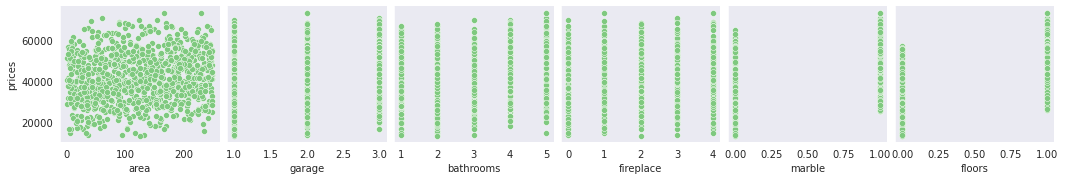

In [34]:
ax = sns.pairplot(
    data = data, 
    x_vars=['area', 'garage', 'bathrooms', 'fireplace', 'marble', 'floors'], 
    y_vars = 'prices'
)

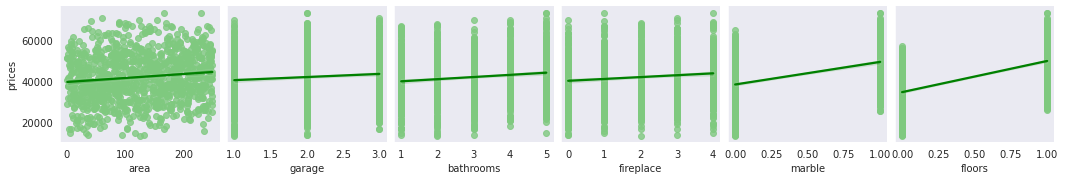

In [35]:
ax = sns.pairplot(
    data = data, 
    x_vars=['area', 'garage', 'bathrooms', 'fireplace', 'marble', 'floors'], 
    y_vars = 'prices',
    kind = 'reg', 
    plot_kws = {
         'line_kws':{
            'color':'green',
        },
    }
)

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [36]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [37]:
y = data['prices']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [38]:
X = data[['area', 'garage', 'bathrooms', 'fireplace', 'marble', 'floors']]

## Criando os datasets de treino e de teste

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2811)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [41]:
model = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [42]:
model.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

In [43]:
print(f'R² = {model.score(X_train, y_train).round(2)}')

R² = 0.64


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [51]:
predicted_y = model.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [52]:
# Here i am comparing the predicted y with y real(y test) and getting r2

print(f'R² = {metrics.r2_score(y_test, predicted_y).round(2)}')

R² = 0.67


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [53]:
area = 28
garage = 2
bathrooms = 4
fireplace = 4
marble = 0
floors = 1
entry = [[area, garage, bathrooms, fireplace, marble, floors]]

print(f'$ {model.predict(entry)[0]:.2f} dolars')

$ 46144.17 dolars


/home/gabriel-liamdev/anaconda3/envs/learn_pandas/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo métricas para o modelo

In [54]:
MSE = metrics.mean_squared_error(y_test, predicted_y).round(2)
SRMSE = np.sqrt(MSE).round(2)
R2 = metrics.r2_score(y_test, predicted_y).round(2)

pd.DataFrame(
    [MSE, SRMSE, R2], 
    ['Mean Squared Error', 'Square Root of Mean Square Error', 'R²'],
    columns = ['Metrics']
)

,Metrics
Mean Squared Error,50197019.50
Square Root of Mean Square Error,7084.99
R²,0.67


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

In [55]:
import pickle

## Salvando o modelo estimado

In [56]:
with open('price_model', 'wb') as output:
    pickle.dump(model, output)

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

with open('price_model','rb') as model:
    lm_new = pickle.load(model)


area = 28
garage = 2
bathrooms = 4
fireplace = 4
marble = 0
floors = 1
entry = [[area, garage, bathrooms, fireplace, marble, floors]]

print(f'$ {model.predict(entry)[0]:.2f} dolars')
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46144.17 dolars
```